# Image Dimesnsions

In [50]:
import cv2 as cv
import numpy as np
path=r'D:\jio\exp\min oil 60\phi=0.5\17.14 34.3_C001H001S0001\processing\17.14 34.3_C001H001S0001000140.jpg'
image = cv.imread(path, cv.IMREAD_GRAYSCALE)

image.shape

(720, 1280)

# Finding channel dimensions

In [51]:
img=cv.imread(path)

def find_coord(event,x,y,flag,params):
    if event==cv.EVENT_FLAG_LBUTTON:
        print(x,',',y)
        font=cv.FONT_HERSHEY_PLAIN
        cv.putText(img,str(x) +','+ str(y), (x,y), font, 1,(255,0,0))
        cv.imshow("image",img)

if __name__=="__main__":

    img=cv.imread(path)
    cv.imshow("image",img)
    cv.setMouseCallback("image",find_coord)
    cv.waitKey(0)
    cv.destroyAllWindows()


773 , 468
772 , 465
770 , 465
774 , 360


# Pixel Values

In [40]:
 

if image is None:
    print("Error: Could not load image.")
else:  
    x = 1022 # column index
    y = 216 # row index
   
    if y < 0 or y >= image.shape[0] or x < 0 or x >= image.shape[1]:
       
        print("Error: Coordinates are out of bounds.")
       
    else:
       
        pixel_value = image[y, x]
        print(f"Pixel value at ({y}, {x}): {pixel_value}")




Pixel value at (216, 1022): 182


In [52]:
import cv2
import glob


x=770
y2=360
y1=464

neck_width=[]
time=[]

folPath =r'D:\jio\exp\min oil 60\phi=0.5\17.14 34.3_C001H001S0001\processing'

#pattern=r'C:\Users\user\Desktop\New folder (2)\phi=0.1\8\*.jpg'
filePaths = list(glob.glob(folPath + r"\*"))
#filePaths=glob.glob(pattern)

for filePath in filePaths:
   
    image = cv2.imread(filePath)
   
   
    if image is None:
        print(f"Error: Unable to load image at {filePath}")
    else:
       
        blur = cv2.GaussianBlur(image, (5,5), 2)
        
        blur2 = cv2.GaussianBlur(blur,(5,5), 2)

        blur3 = cv2.GaussianBlur(blur2,(5,5), 2)

        kernelSize=5

        medianBlur=cv2.medianBlur(blur3,kernelSize)
        #low_threshold=50
        #high_threshold=150

        low_threshold=10
        high_threshold=20

        edges = cv2.Canny(medianBlur, low_threshold, high_threshold)
        blurred_image = cv2.GaussianBlur(edges, (5,5), 0)
        
        _, otsu_thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
   
        #cv2.imshow("Otsu Thresholded Image", otsu_thresholded_image)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

        #otsu_thresholded_image[134,1100] = 0  
        max_pixel=-1

        for i in range(y1 - y2 + 1):
            pixel = otsu_thresholded_image[y2 + i, x]

            if pixel > max_pixel:
                max_pixel = pixel
                k = y2 + i
   
    #print('pixel_value= ',k)
    z = 250/(y1-y2)
    
    distance = (y1 - k) * z    
    #if distance!=195:
        #neck_width.append(distance)
    #else :
        #neck_width.append(None)
    neck_width.append(distance)
    
    
q=0
for i in neck_width:
    q+=1

q

395

In [42]:
print(otsu_thresholded_image.shape)


(480, 1280)


In [53]:
fps=6400
time=[]
t0=1
for i in range(0,q):
    time.append(i/(fps*t0))

len(time)

395

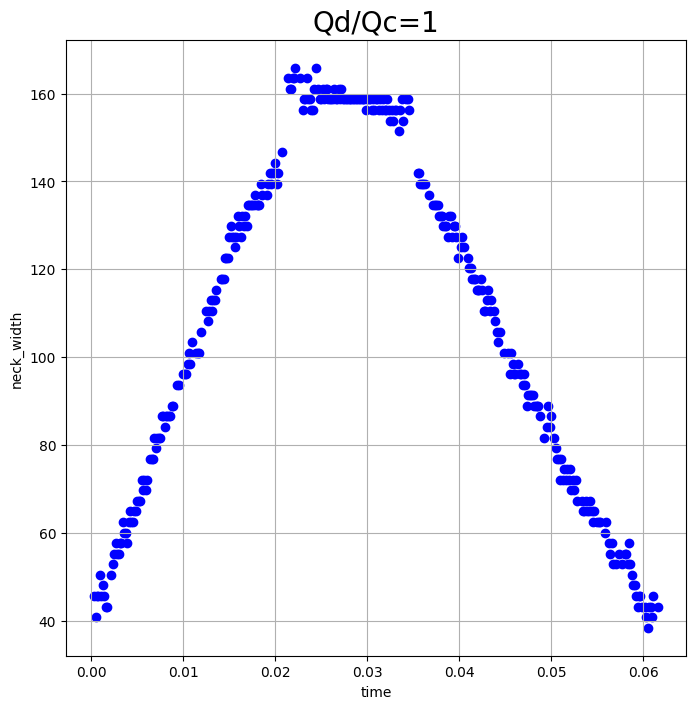

In [56]:


n=[]
for i in neck_width:
    n.append(i)
t=[]
for i in time:
    t.append(i)

idx=[]
for i in range(len(neck_width)):
    if n[i]>=250 or n[i]<=20 :
        idx.append(i)
idx.sort(reverse=True)
for i in idx:
    del t[i]
    del n[i]
xf=[]
yf=[]
tol=5
for i in range(len(t)):
    if abs(n[i]-n[i-1])<=tol:
        yf.append(n[i])
        xf.append(t[i])
        


        
import matplotlib.pyplot as plt
import pandas as pd
#df1=pd.read_excel(r'C:\Users\user\Desktop\New folder (2)\phi=0.1\5\5new.xlsx')
#x1=df1['time']
#y1=df1['neck']
plt.figure(figsize=(8,8))
#plt.scatter(x1,y1,color='red',lw=1)
#plt.scatter(time,neck_width,color='blue',lw=1)
plt.scatter(xf,yf,color='blue',lw=1)
plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=1',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



In [119]:
fps=6400
t=0.005



k=27


fps*t+k

59.0

In [ ]:
t_last=0.67

In [59]:
import pandas as pd
df=pd.DataFrame({'time':xf,'neck':yf})
excel=r'D:\jio\exp\min oil 60\phi=0.5\17.14 34.3_C001H001S0001\processing\min12.xlsx'
df.to_excel(excel,index=False,engine='openpyxl')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


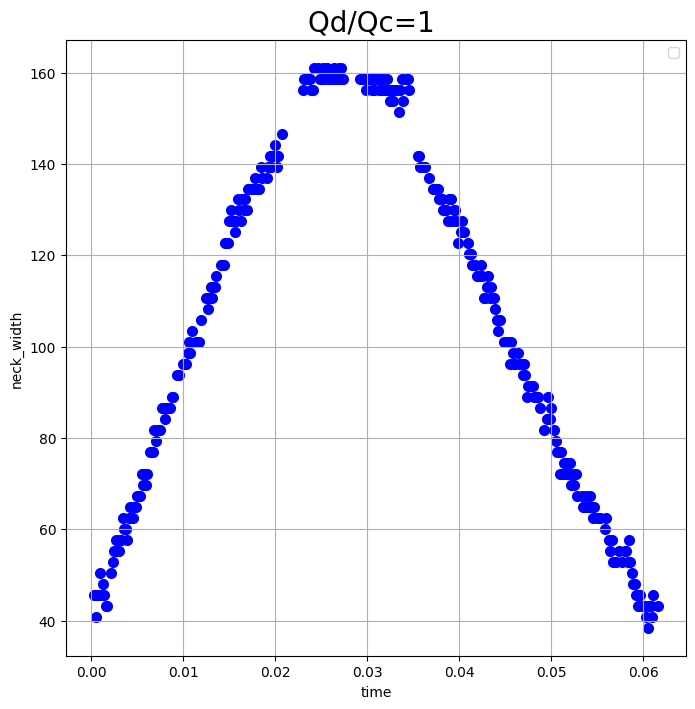

In [62]:
import pandas as pd
#excel=r'D:\jio\exp\test\phi = 0.5 min oil\(7.5 15)_C001H001S0001\processing\mini1.xlsx'
df1=pd.read_excel(excel)
import matplotlib.pyplot as plt

x1=df1['time']
y1=df1['neck']

plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o')
plt.legend()
plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=1 ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



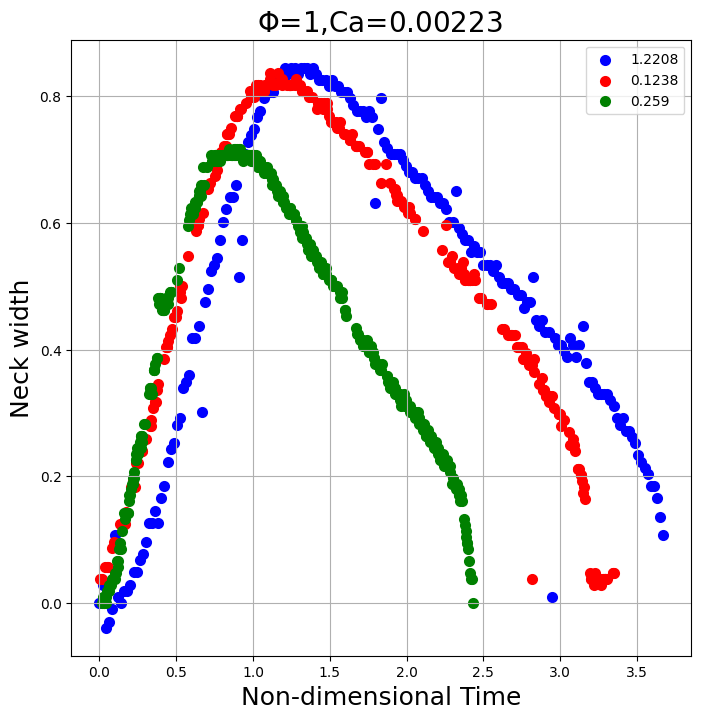

In [16]:
import pandas as pd

df1=pd.read_excel(r'D:\jio\exp\hexa (30)\phi=1\(96.8,96.8)(new)_C001H001S0001\processing\hex1.xlsx')
import matplotlib.pyplot as plt
#df1=pd.read_excel(path2test)



df2=pd.read_excel(r'D:\jio\exp\min oil (30)\(10 10)_C001H001S0001\processing\min1.xlsx')
df3=pd.read_excel(r'D:\jio\exp\min oil 60\phi=1\8.57 new_C001H001S0001\processing\minsix1.xlsx')
#df4=pd.read_excel(r'D:\exp\phi=1\lambda = 0.259\process\35\35_new.xlsx')
#df5=pd.read_excel(r'C:\Users\user\Desktop\Prabal\neck_width_cal\mineral oil\phi=0.25\fol-no=8\8.xlsx')

x1=df1['time']/((250*10**(-6))/0.032266634)
y1=df1['neck']/250

x2=df2['time']/((250*10**(-6))/0.0033333)
#(1.97)
y2=df2['neck']/250

x3=df3['time']/((250*10**(-6))/0.002856664)
y3=df3['neck']/250

#x4=df4['time']
#y4=df4['neck']/180

#x5=df4['time']
#y5=df4['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='1.2208')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='0.1238')
plt.scatter(x3,y3,color='green',lw=2,marker='o',label='0.259' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='mineral oil with glycerol water mixture')
#plt.scatter(x5,y5,color='black',lw=2,marker='^',label=4)
plt.legend()
plt.xlabel('Non-dimensional Time',fontsize=18)
plt.ylabel('Neck width',fontsize=18)
plt.title('$\Phi$=1,Ca=0.00223 ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



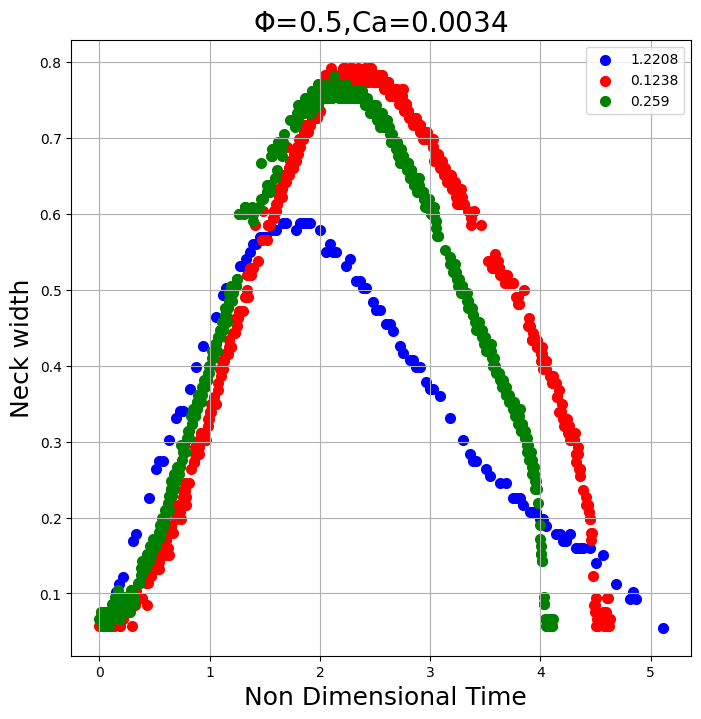

In [23]:
import pandas as pd

df1=pd.read_excel(r'D:\jio\exp\hexa (30)\phi=0.5\72.6 145.2_C001H001S0001\processing\hexa1_shifted.xlsx')
import matplotlib.pyplot as plt
#df1=pd.read_excel(path2test)



df2=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(7.5 15)_C001H001S0001\mini1.xlsx')
df3=pd.read_excel(r'D:\jio\exp\min oil 60\phi=0.5\6.4 12.85_C001H001S0001\processing\minisixs1.xlsx')
#df4=pd.read_excel(r'D:\exp\phi=1\lambda = 0.259\process\35\35_new.xlsx')
#df5=pd.read_excel(r'C:\Users\user\Desktop\Prabal\neck_width_cal\mineral oil\phi=0.25\fol-no=8\8.xlsx')

x1=df1['time']/((250*10**(-6))/0.0484)
y1=df1['neck']/250

x2=df2['time']/((250*10**(-6))/0.005)
#(1.97)
y2=df2['neck']/250

x3=df3['time']/((250*10**(-6))/0.004283329)
y3=df3['neck']/250

#x4=df4['time']
#y4=df4['neck']/180

#x5=df4['time']
#y5=df4['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='1.2208')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='0.1238')
plt.scatter(x3,y3,color='green',lw=2,marker='o',label='0.259' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='mineral oil with glycerol water mixture')
#plt.scatter(x5,y5,color='black',lw=2,marker='^',label=4)
plt.legend()
plt.xlabel(' Non Dimensional Time',fontsize=18)
plt.ylabel('Neck width',fontsize=18)
plt.title('$\Phi$=0.5,Ca=0.0034 ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



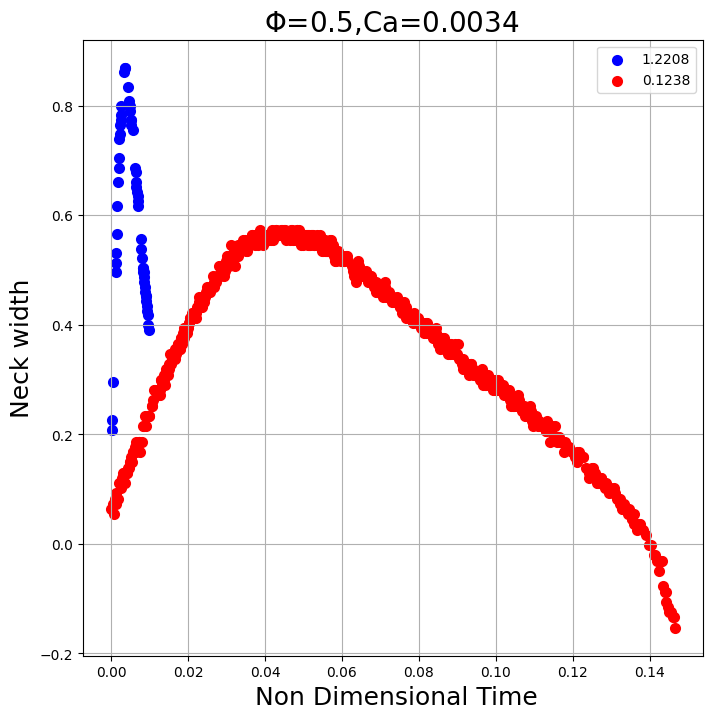

In [3]:
import pandas as pd

df1=pd.read_excel(r'D:\jio\exp\hexa (0)\phi=1\3_1.xlsx')
import matplotlib.pyplot as plt
#df1=pd.read_excel(path2test)



df2=pd.read_excel(r'D:\jio\exp\min oil (30)\(15 15)_C001H001S0001\processing\min2new.xlsx')
df3=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(7.5 15)_C001H001S0001\mini1.xlsx')
#df4=pd.read_excel(r'D:\exp\phi=1\lambda = 0.259\process\35\35_new.xlsx')
#df5=pd.read_excel(r'C:\Users\user\Desktop\Prabal\neck_width_cal\mineral oil\phi=0.25\fol-no=8\8.xlsx')

x1=df1['time']#/((250*10**(-6))/0.05316666)
y1=df1['neck']/250

x2=df2['time']#/((250*10**(-6))/0.004283329)
#(1.97)
y2=df2['neck']/250

#x3=df3['time']/((250*10**(-6))/0.004283329)
#y3=df3['neck']/250

#x4=df4['time']
#y4=df4['neck']/180

#x5=df4['time']
#y5=df4['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='1.2208')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='0.1238')
#plt.scatter(x3,y3,color='green',lw=2,marker='o',label='0.259' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='mineral oil with glycerol water mixture')
#plt.scatter(x5,y5,color='black',lw=2,marker='^',label=4)
plt.legend()
plt.xlabel(' Non Dimensional Time',fontsize=18)
plt.ylabel('Neck width',fontsize=18)
plt.title('$\Phi$=0.5,Ca=0.0034 ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



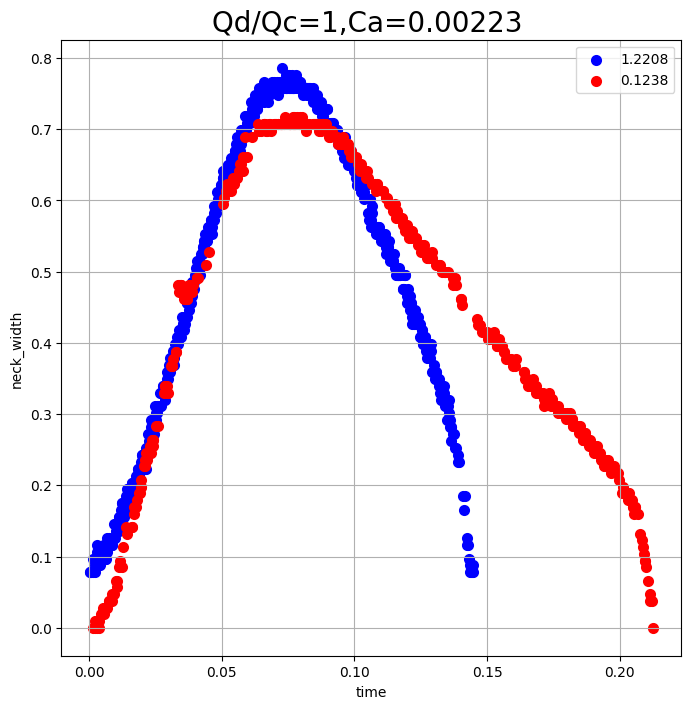

In [32]:
import pandas as pd

df1=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(10 20)_C001H001S0001\processing\mini3.xlsx')
import matplotlib.pyplot as plt
#df1=pd.read_excel(path2test)



df2=pd.read_excel(r'D:\jio\exp\min oil 60\phi=1\8.57 new_C001H001S0001\processing\minsix1.xlsx')
#df3=pd.read_excel(r'D:\jio\exp\min oil 60\phi=1\8.57 new_C001H001S0001\processing\minsix1.xlsx')
#df4=pd.read_excel(r'D:\exp\phi=1\lambda = 0.259\process\35\35_new.xlsx')
#df5=pd.read_excel(r'C:\Users\user\Desktop\Prabal\neck_width_cal\mineral oil\phi=0.25\fol-no=8\8.xlsx')

x1=df1['time']#/((250*10**(-6))/0.00666666)
y1=df1['neck']/250

x2=df2['time']#/((250*10**(-6))/0.002856664)
y2=df2['neck']/250

#x3=df3['time']/(23.67*250*10**(-6)/35)
#y3=df3['neck']/250

#x4=df4['time']
#y4=df4['neck']/180

#x5=df4['time']
#y5=df4['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='1.2208')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='0.1238')
#plt.scatter(x3,y3,color='green',lw=2,marker='o',label='0.259' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='mineral oil with glycerol water mixture')
#plt.scatter(x5,y5,color='black',lw=2,marker='^',label=4)
plt.legend()
plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=1,Ca=0.00223 ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



# Ca Variation

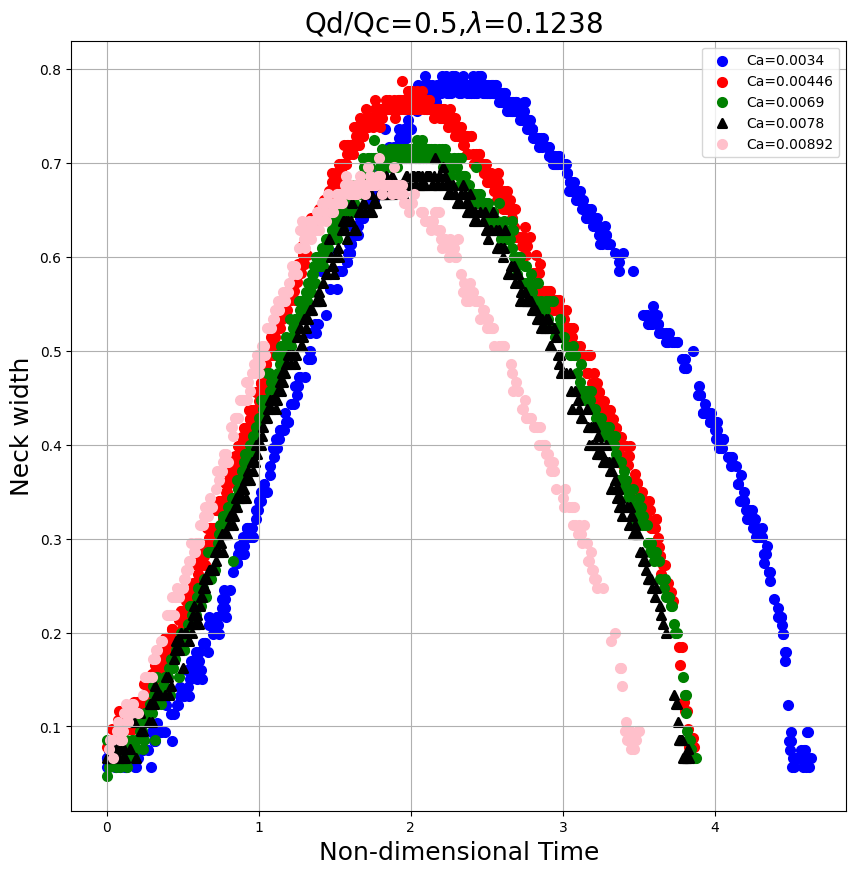

In [11]:
import pandas as pd


import matplotlib.pyplot as plt



df1=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(7.5 15)_C001H001S0001\mini1.xlsx')
df2=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(10 20)_C001H001S0001\processing\mini3.xlsx')
df3=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(15 30))_C001H001S0001\processing\min2_3.xlsx')
df4=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(17.5 35)_C001H001S0001\processing\min2_4.xlsx')
df5=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(20 40)_C001H001S0001\New folder\min2_5.xlsx')
#df6=pd.read_excel(r'D:\jio\exp\min oil (30)\(40 40)_C001H001S0001\processing\mini7.xlsx')

x1=df1['time']/((250*10**(-6))/0.005)
y1=df1['neck']/250

x2=df2['time']/((250*10**(-6))/0.00667)
y2=df2['neck']/250

x3=df3['time']/((250*10**(-6))/0.01)
y3=df3['neck']/250

x4=df4['time']/((250*10**(-6))/0.011667)
y4=df4['neck']/250

x5=df5['time']/((250*10**(-6))/0.01333)
y5=df5['neck']/250

#x6=df6['time']
#y6=df6['neck']/250


plt.figure(figsize=(10,10))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='Ca=0.0034')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='Ca=0.00446')
plt.scatter(x3,y3,color='green',lw=2,marker='o',label='Ca=0.0069' )
plt.scatter(x4,y4,color='black',lw=2,marker='^',label='Ca=0.0078')
plt.scatter(x5,y5,color='pink',lw=2,marker='o',label='Ca=0.00892')
#plt.scatter(x6,y6,color='yellow',lw=2,marker='^',label='Ca=0.0092')
plt.legend()
plt.xlabel('Non-dimensional Time',fontsize=18)
plt.ylabel('Neck width',fontsize=18)
plt.title('Qd/Qc=0.5,$\lambda$=0.1238  ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



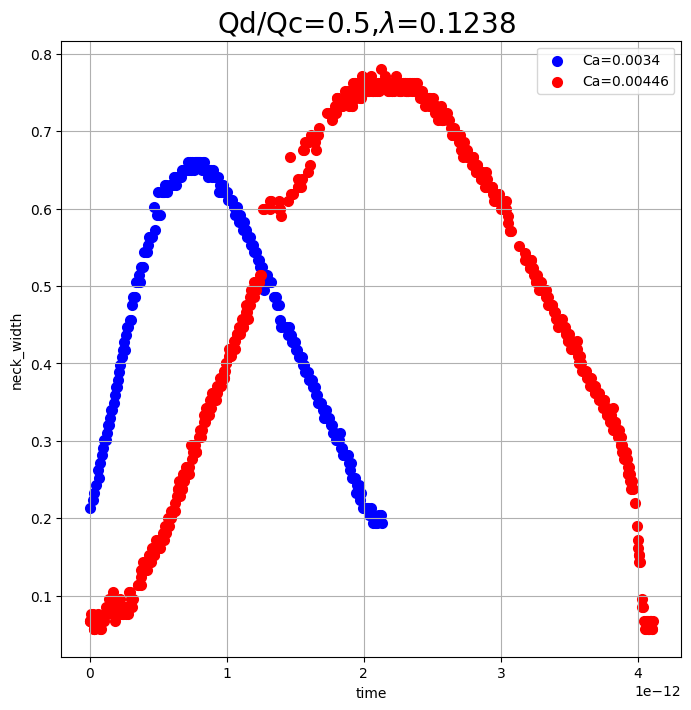

In [5]:
import pandas as pd


import matplotlib.pyplot as plt



df1=pd.read_excel(r'D:\jio\exp\min oil (30)\(40 40)_C001H001S0001\processing\mini7.xlsx')
df2=pd.read_excel(r'D:\jio\exp\min oil 60\phi=0.5\6.4 12.85_C001H001S0001\processing\minisixs1.xlsx')
df3=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(15 30))_C001H001S0001\processing\min2_3.xlsx')
df4=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(17.5 35)_C001H001S0001\processing\min2_4.xlsx')
df5=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(20 40)_C001H001S0001\New folder\min2_5.xlsx')
#df6=pd.read_excel(r'D:\jio\exp\min oil (30)\(40 40)_C001H001S0001\processing\mini7.xlsx')

x1=df1['time']/((250*10**(6))/0.01333332)
y1=df1['neck']/250

x2=df2['time']/((250*10**(6))/0.004283329)

y2=df2['neck']/250

x3=df3['time']/((250*10**(-6))/0.01)
y3=df3['neck']/(0.00878294*10**(6))

x4=df4['time']/((250*10**(-6))/0.011667)
y4=df4['neck']/(0.007528234*10**(6))

x5=df5['time']/((250*10**(-6))/0.01333)
y5=df5['neck']/(0.006587205*10**(6))

#x6=df6['time']
#y6=df6['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='Ca=0.0034')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='Ca=0.00446')
#plt.scatter(x3,y3,color='green',lw=2,marker='o',label='Ca=0.0069' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='Ca=0.0078')
#plt.scatter(x5,y5,color='pink',lw=2,marker='o',label='Ca=0.00892')
#plt.scatter(x6,y6,color='yellow',lw=2,marker='^',label='Ca=0.0092')
plt.legend()
plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=0.5,$\lambda$=0.1238  ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



# phi variation

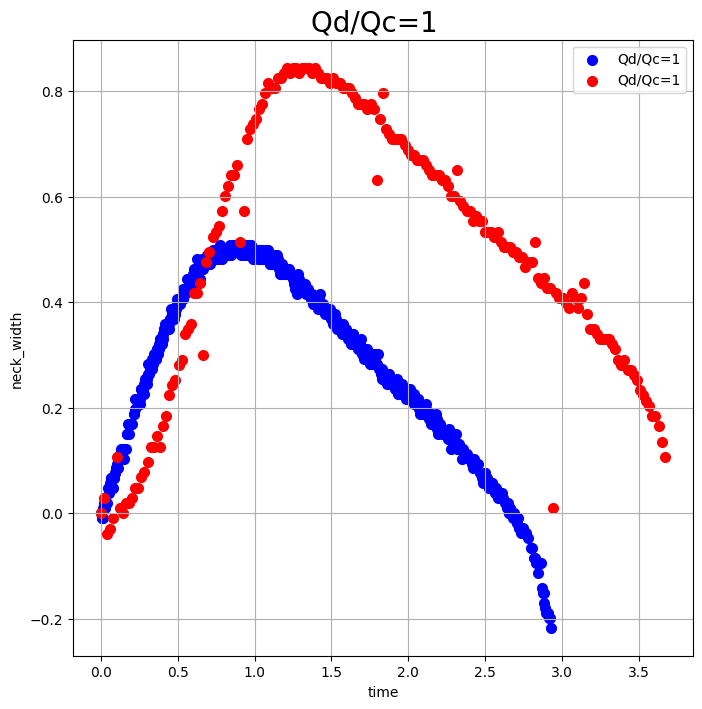

In [27]:
import pandas as pd


import matplotlib.pyplot as plt



df1=pd.read_excel(r'D:\jio\exp\min oil (30)\(15 15)_C001H001S0001\processing\min2new.xlsx')
df2=pd.read_excel(r'D:\jio\exp\hexa (30)\phi=1\(96.8,96.8)(new)_C001H001S0001\processing\hex1.xlsx')
df3=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(15 30))_C001H001S0001\processing\min2_3.xlsx')
df4=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(17.5 35)_C001H001S0001\processing\min2_4.xlsx')
df5=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(20 40)_C001H001S0001\New folder\min2_5.xlsx')
#df6=pd.read_excel(r'D:\jio\exp\min oil (30)\(40 40)_C001H001S0001\processing\mini7.xlsx')

x1=df1['time']/((250*10**(-6))/0.005)
y1=df1['neck']/250

x2=df2['time']/((250*10**(-6))/0.032266634)
y2=df2['neck']/250

x3=df3['time']
y3=df3['neck']/250

x4=df4['time']
y4=df4['neck']/250

x5=df5['time']
y5=df5['neck']/250

#x6=df6['time']
#y6=df6['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='Qd/Qc=1')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='Qd/Qc=1')
#plt.scatter(x3,y3,color='green',lw=2,marker='o',label='Ca=0.0069' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='Ca=0.0078')
#plt.scatter(x5,y5,color='pink',lw=2,marker='o',label='Ca=0.00892')
#plt.scatter(x6,y6,color='yellow',lw=2,marker='^',label='Ca=0.0092')
plt.legend()
plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=1  ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



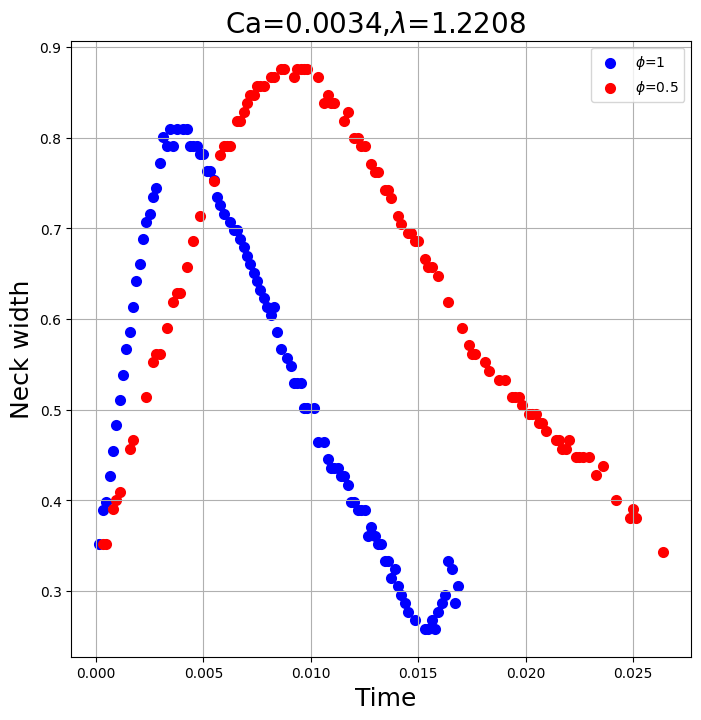

In [36]:
import pandas as pd


import matplotlib.pyplot as plt



df1=pd.read_excel(r'D:\jio\exp\hexa (30)\phi=1\(145.2 145.2)_C001H001S0001\processing\hexa3.xlsx')
df2=pd.read_excel(r'D:\jio\exp\hexa (30)\phi=0.5\72.6 145.2_C001H001S0001\processing\hexa1.xlsx')
df3=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(15 30))_C001H001S0001\processing\min2_3.xlsx')
df4=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(17.5 35)_C001H001S0001\processing\min2_4.xlsx')
df5=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(20 40)_C001H001S0001\New folder\min2_5.xlsx')
#df6=pd.read_excel(r'D:\jio\exp\min oil (30)\(40 40)_C001H001S0001\processing\mini7.xlsx')

x1=df1['time']#/((250*10**(-6))/0.048399952)
y1=df1['neck']/250

x2=df2['time']#/((250*10**(-6))/0.024199976)
y2=df2['neck']/250

x3=df3['time']
y3=df3['neck']/250

x4=df4['time']
y4=df4['neck']/250

x5=df5['time']
y5=df5['neck']/250

#x6=df6['time']
#y6=df6['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='$\phi$=1')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='$\phi$=0.5')
#plt.scatter(x3,y3,color='green',lw=2,marker='o',label='Ca=0.0069' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='Ca=0.0078')
#plt.scatter(x5,y5,color='pink',lw=2,marker='o',label='Ca=0.00892')
#plt.scatter(x6,y6,color='yellow',lw=2,marker='^',label='Ca=0.0092')
plt.legend()
plt.xlabel(' Time',fontsize=18)
plt.ylabel('Neck width',fontsize=18)
plt.title('Ca=0.0034,$\lambda$=1.2208  ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



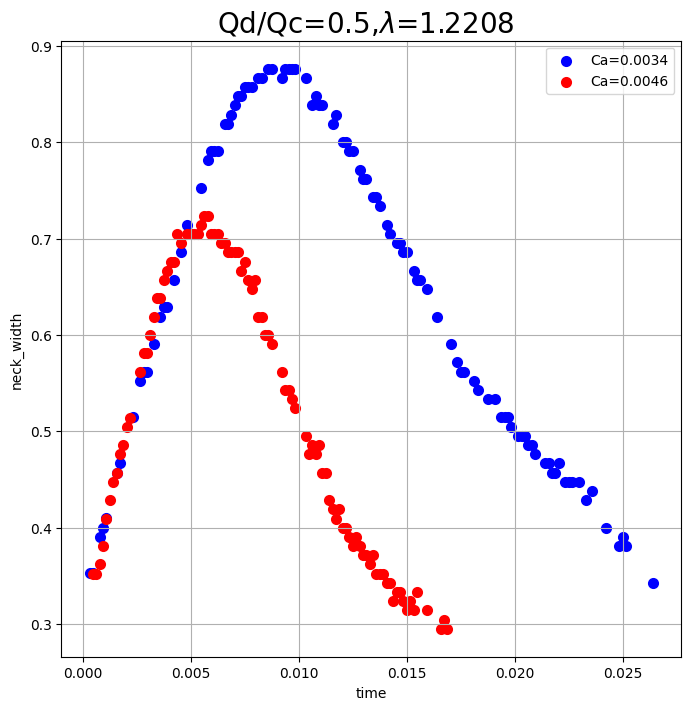

In [12]:
import pandas as pd


import matplotlib.pyplot as plt



df1=pd.read_excel(r'D:\jio\exp\hexa (30)\phi=0.5\72.6 145.2_C001H001S0001\processing\hexa1.xlsx')
df2=pd.read_excel(r'D:\jio\exp\hexa (30)\phi=0.5\96.8 193.6_C001H001S0001\processing\hexaa2_shift.xlsx')
df3=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(15 30))_C001H001S0001\processing\min2_3.xlsx')
df4=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(17.5 35)_C001H001S0001\processing\min2_4.xlsx')
df5=pd.read_excel(r'D:\jio\exp\phi = 0.5 min oil\(20 40)_C001H001S0001\New folder\min2_5.xlsx')
#df6=pd.read_excel(r'D:\jio\exp\min oil (30)\(40 40)_C001H001S0001\processing\mini7.xlsx')

x1=df1['time']
y1=df1['neck']/250

x2=df2['time']
y2=df2['neck']/250

x3=df3['time']
y3=df3['neck']/250

x4=df4['time']
y4=df4['neck']/250

x5=df5['time']
y5=df5['neck']/250

#x6=df6['time']
#y6=df6['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='blue',lw=2,marker='o',label='Ca=0.0034')
plt.scatter(x2,y2,color='red',lw=2,marker='o',label='Ca=0.0046')
#plt.scatter(x3,y3,color='green',lw=2,marker='o',label='Ca=0.0069' )
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label='Ca=0.0078')
#plt.scatter(x5,y5,color='pink',lw=2,marker='o',label='Ca=0.00892')
#plt.scatter(x6,y6,color='yellow',lw=2,marker='^',label='Ca=0.0092')
plt.legend()
plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=0.5,$\lambda$=1.2208  ',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



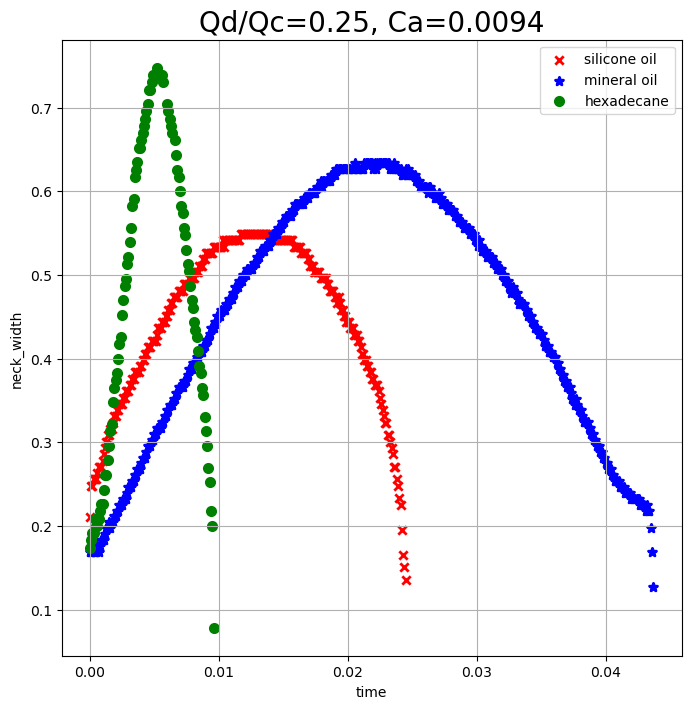

In [132]:
import pandas as pd


import matplotlib.pyplot as plt
df1=pd.read_excel(r'C:\Users\user\Desktop\Prabal\neck_width_cal\silicone oil\phi=0.25\fol-no=5\5points_deleted.xlsx')
df2=pd.read_excel(r'C:\Users\user\Desktop\Prabal\neck_width_cal\mineral oil\phi=0.25\fol-no=8\8_clean.xlsx')
df3=pd.read_excel(r'C:\Users\user\Desktop\Prabal\neck_width_cal\hexadecane\phi=0.25\fol-no=7\7.xlsx')
#df4=pd.read_excel(r'C:\Users\user\Desktop\New folder (2)\phi=0.1\8\8new2.xlsx')

x1=df1['time']
y1=df1['neck']/250

x2=df2['time']
y2=df2['neck']/250

x3=df3['time']
y3=df3['neck']/250

#x4=df4['time']/0.0263
#y4=df4['neck']/250


plt.figure(figsize=(8,8))
plt.scatter(x1,y1,color='red',lw=2,marker='x',label='silicone oil')
plt.scatter(x2,y2,color='blue',lw=2,marker='*',label='mineral oil')
plt.scatter(x3,y3,color='green',lw=2,marker='o',label='hexadecane')
#plt.scatter(x4,y4,color='black',lw=2,marker='^',label=4)
plt.legend()
plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=0.25, Ca=0.0094',fontsize=20)
#plt.xlim(xf[0],xf[-1])
plt.grid()



In [68]:
0.3*0.112


0.0336

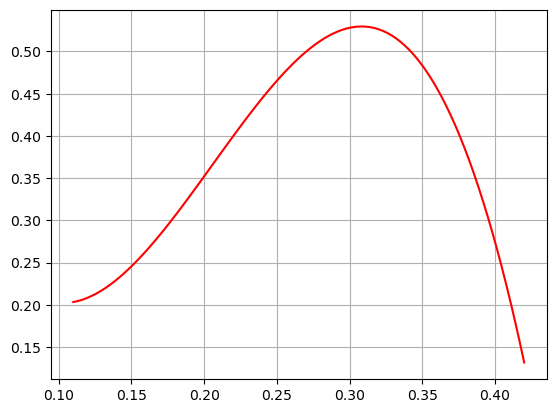

In [25]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import minimize
x=np.array(x)
y=np.array(y)

def func(x,a,b,c,d,k):
    return (-a*(x/0.09-k)**3+b*(x/0.09-k)**2-c*(x/0.09-k)+d)*0.125

initialGuess=[0.2,1.5,1.9,0.2,-1.5]
popt,pcov=curve_fit(func,x,y,initialGuess)
#print(popt)

xfit=np.linspace(0.11,0.42,100)
plt.plot(xfit,func(xfit,*popt),'r')#,label='fit params: a=%5.3f,b=%5.3f' % tuple(popt))
plt.grid()
plt.show()

In [86]:
#1351-2660
3942-5043

-1101

In [25]:
excel=pd.ExcelWriter('new.xlsx')

In [26]:
df.to_excel(excel)

In [27]:
excel.save()

AttributeError: 'OpenpyxlWriter' object has no attribute 'save'

In [28]:
!pip install openpyxl

In [9]:
image=cv2.imread('Min oil_4 2micr 0.01V_4_C001H001S0001002032.jpg')
blur = cv2.GaussianBlur(image, (5,5), 2)
blur2 = cv2.GaussianBlur(blur,(3,3), 2)

low_threshold=50
high_threshold=150
edges = cv2.Canny(blur2, low_threshold, high_threshold)
blurred_image = cv2.GaussianBlur(edges, (5, 5), 0)
_, otsu_thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite(r'C:\Users\user\Desktop\testing2\new3.jpg',otsu_thresholded_image)

True

In [13]:
import cv2 as cv


In [14]:
q=cv.imread("oil25 water3_C001H001S0001003706.jpg")

In [23]:
px=q[127,1118]
px

array([140, 140, 140], dtype=uint8)

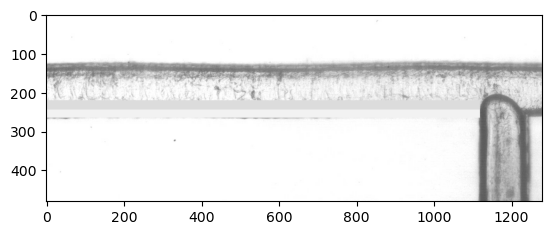

In [48]:
import matplotlib.pyplot as plt
q=cv.cvtColor(q,cv.COLOR_BGR2RGB)
q[244:265,0:1120]=242
plt.imshow(q)

In [34]:
a=2
a

2

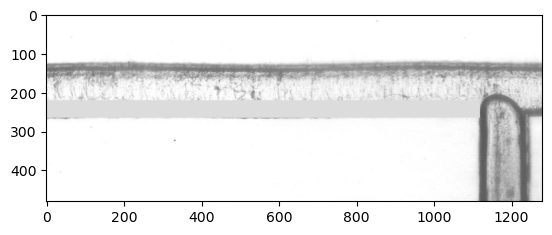

In [51]:
import matplotlib.pyplot as plt
q=cv.imread("oil25 water3_C001H001S0001003706.jpg")
q=cv.cvtColor(q,cv.COLOR_BGR2RGB)
q[220:265,0:1120]=220
plt.imshow(q)

In [52]:
cv.imwrite(r'C:\Users\user\Desktop\testing\test.jpg',q)

True

In [29]:
import numpy as np


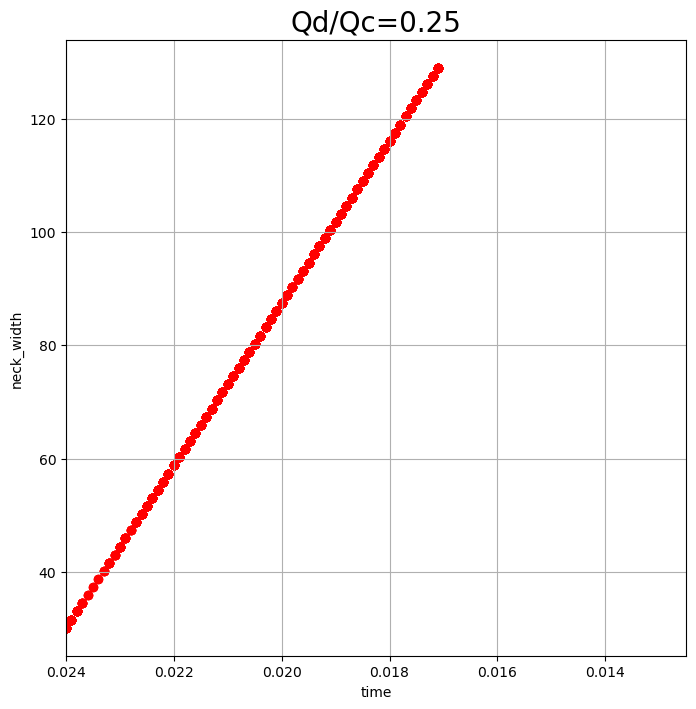

In [160]:
import numpy as np
import matplotlib.pyplot as plt

y = neck_width
x= time

plt.figure(figsize=(8,8))

plt.scatter(t,n,lw=0.8,color='red',linestyle='-')


plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=0.25',fontsize=20)
plt.xlim(x[0],x[-1])
plt.grid()
plt.show()

In [42]:
time=0.41
ini =3127
fps=10000
fps*time+ini

7227.0

In [39]:
import pandas as pd
df=pd.DataFrame({'time':time,'neck':neck})

In [28]:
df

,time,neck
0,0.0000,30.110294
1,0.0001,30.110294
2,0.0002,30.110294
3,0.0003,30.110294
4,0.0004,30.110294
...,...,...
3611,0.3611,195.000000
3612,0.3612,195.000000
3613,0.3613,195.000000
3614,0.3614,195.000000


In [22]:
!pip install pandas openpyxl

In [40]:
excel=r'C:\Users\user\Desktop\New folder (2)\data\phi=0.1(3).xlsx'
df.to_excel(excel,index=False,engine='openpyxl')

In [44]:
df1=pd.read_excel(r'C:\Users\user\Desktop\New folder (2)\data\phi=0.1(3).xlsx')

In [45]:
df1

,time,neck
0,0.0000,30.110294
1,0.0001,30.110294
2,0.0002,30.110294
3,0.0003,30.110294
4,0.0004,30.110294
...,...,...
3611,0.3611,195.000000
3612,0.3612,195.000000
3613,0.3613,195.000000
3614,0.3614,195.000000


In [66]:
x=df1.iloc[:,0]
y=df1.iloc[:,1]
Y=[]
for x in y:
    Y.append(x)
X=[]
for i in x:
    X.append(i)
for i in range(len(X)):
    if X[i]<= 0.2716:
       for i in range(len(Y)):
           if Y[i+1]>=Y[i]:
               yf.append(Y[i+1])

    else:
        for i in range(len(Y)):
           if Y[i+1]<=Y[i]:
               yf.append(Y[i+1])
               




TypeError: 'float' object is not iterable

In [117]:
x=df1.iloc[:,0]
y=df1.iloc[:,1]
Y=[]
for i in y:
    Y.append(i)
X=[]
xf=[]
for i in x:
    X.append(i)
yf=[]
tol=0.1
for i in range(len(X)):
    if abs(Y[i]-Y[i-1])<=tol:
        yf.append(Y[i])
        xf.append(X[i])
        

   

len(Y)-len(yf)
print(len(yf))

2535


In [141]:
Y=list(filter(lambda x:x!=195,Y))

In [139]:
for i in range(len(Y)):
    if Y[i]==195:
        Y.remove(Y[i])
        X.remove(X[i])

IndexError: list index out of range

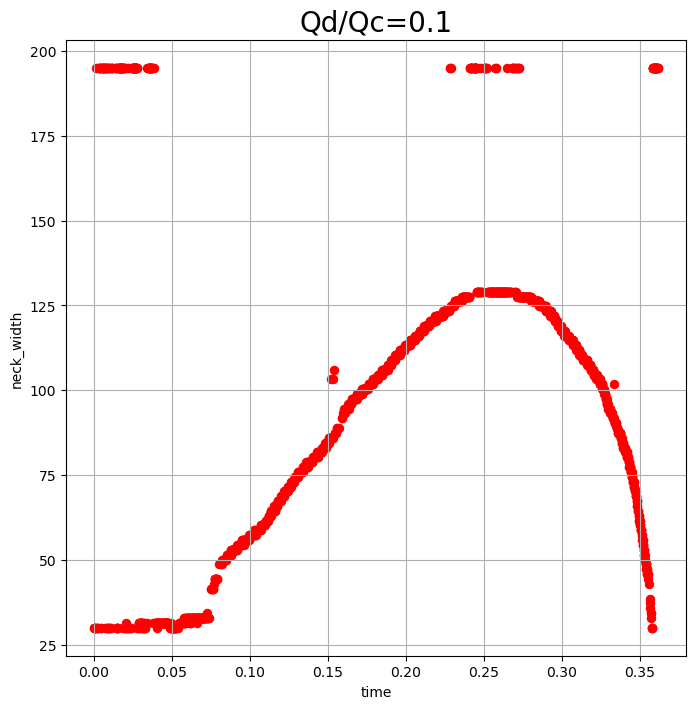

In [118]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(8,8))
plt.scatter(xf,yf,lw=0.8,color='red',linestyle='-')


plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=0.1',fontsize=20)
#plt.xlim(x[0],x[-1])
plt.grid()
plt.show()

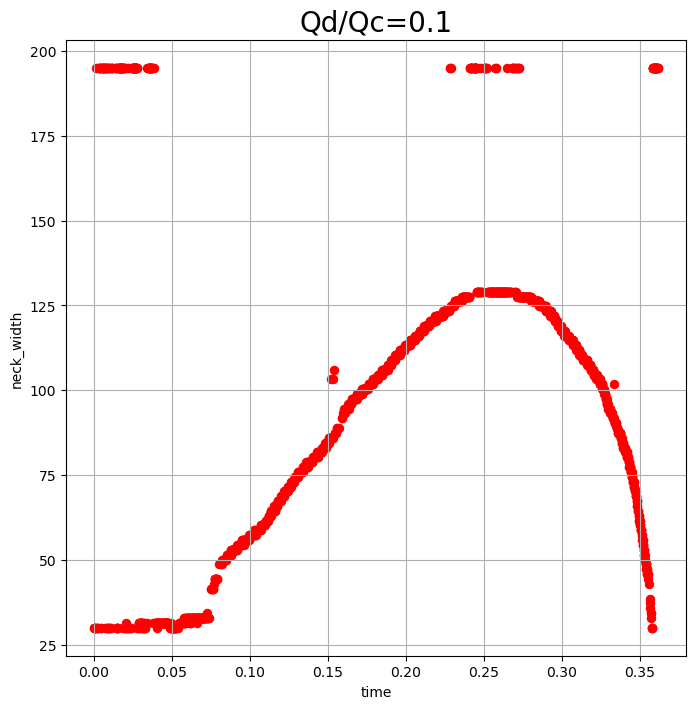

In [124]:
dff=pd.DataFrame({'time':xf,'neck':yf})
path_to_excel=r'C:\Users\user\Desktop\New folder (2)\data\phi=0.1(finer).xlsx'
dff.to_excel(path_to_excel,index=False,engine='openpyxl')
df1=pd.read_excel(r'C:\Users\user\Desktop\New folder (2)\data\phi=0.1(finer).xlsx')

x=df1.iloc[:,0]
y=df1.iloc[:,1]
plt.figure(figsize=(8,8))
plt.scatter(x,y,lw=0.8,color='red',linestyle='-')


plt.xlabel('time')
plt.ylabel('neck_width')
plt.title('Qd/Qc=0.1',fontsize=20)
#plt.xlim(x[0],x[-1])
plt.grid()
plt.show()

In [72]:
x=df1.iloc[:,0]
y=df1.iloc[:,1]
Y=[]
for i in y:
    Y.append(i)

X=[]
for i in x:
    X.append(i)

In [59]:
for i in range(len(Y)):
    print(Y[i])

30.11029411764706
30.11029411764706
30.11029411764706
30.11029411764706
30.11029411764706
195.0
30.11029411764706
30.11029411764706
30.11029411764706
30.11029411764706
195.0
30.11029411764706
195.0
30.11029411764706
195.0
195.0
195.0
30.11029411764706
30.11029411764706
30.11029411764706
195.0
30.11029411764706
195.0
30.11029411764706
30.11029411764706
195.0
30.11029411764706
30.11029411764706
195.0
195.0
30.11029411764706
195.0
30.11029411764706
195.0
195.0
195.0
30.11029411764706
195.0
195.0
195.0
195.0
30.11029411764706
195.0
195.0
30.11029411764706
30.11029411764706
30.11029411764706
195.0
195.0
195.0
30.11029411764706
195.0
30.11029411764706
195.0
195.0
195.0
195.0
195.0
195.0
30.11029411764706
195.0
30.11029411764706
195.0
195.0
195.0
195.0
195.0
30.11029411764706
30.11029411764706
195.0
195.0
195.0
195.0
30.11029411764706
195.0
195.0
30.11029411764706
30.11029411764706
195.0
195.0
195.0
195.0
195.0
195.0
30.11029411764706
30.11029411764706
195.0
30.11029411764706
195.0
30.1102941

In [10]:
x=df1.iloc[:,0]
y=df1.iloc[:,1]
plt.figure(figsize=(8,8))
plt.scatter(x,y,lw=1,color='red',linestyle='-')


plt.xlabel('time')
plt.ylabel('neck_width')
plt.title("Qd/Qc=0.25",fontsize=20)
#plt.xlim(x[0],x[-1])
plt.grid()
plt.show()

NameError: name 'df1' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

x= x[:,np.newaxis]
degree=3
poly=PolynomialFeatures(degree)
X_poly=ploy.fit_transform(x)
model=LinearRegression()
model.fit_transform(X_poly,y)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(X_poly,y,lw=1,color='red',linestyle='-')


plt.xlabel('time')
plt.ylabel('neck_width')
#plt.xlim(x[0],x[-1])
plt.grid()
plt.show()

In [63]:
excel=r'C:\Users\user\Desktop\final_run3\neck_width3.xlsx'
df.to_excel(excel,index=False,engine='openpyxl')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



def model(t,a,b):
    return (a-t)**(b)*np.exp(t-a)

params,params_covariance=curve_fit(model,time,neck,p0=[2,2])

neck_fit=model(time,*params)

plt.figure(figsize=(8,8))
plt.scatter(time,neck_fit,lw=0.8,color='red',linestyle='-')


plt.xlabel('time')
plt.ylabel('neck_width_fit')
plt.title('Qd/Qc=0.25',fontsize=20)
plt.xlim(x[0],x[-1])
plt.grid()
plt.show()

In [36]:
data=pd.read_excel(r'C:\Users\user\Desktop\New folder (2)\data\phi=0.1(1).xlsx')

data_sort=df.sort_values(by='neck')

data_sort.to_excel(r'C:\Users\user\Desktop\New folder (2)\data\phi=0.1(1)sorted.xlsx',index=False)

In [61]:
neck.sort()[:30]
neck

TypeError: 'NoneType' object is not subscriptable

In [55]:
max=neck[0]
for i in neck[1:]:
    if i>max :
        max=i
        max!=195

max

195.0

In [42]:
new=np.array(neck)
new

array([  5.67961165,   5.67961165,   5.67961165, ..., 195.        ,
       195.        , 195.        ])

In [44]:
max=0
for i in new:
    if new(i)>max:
        max=new(i)

TypeError: 'numpy.ndarray' object is not callable

In [48]:
x=[1,2,3]
max=0
for i in (3):
    if x[i]>max:
        max=x[i]

TypeError: 'int' object is not iterable